In [20]:
import pandas as pd
import re
import nltk

In [526]:
rawdata=pd.read_csv('etsy_data.csv')

In [218]:
rawdata.head()

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
0,"Height: 8 Inches; Width: 10 Inches,13,046,2010...",\n You save $0.90 (30%)\n ...,\n Bestseller\n,\n This listing is for the ...,\n DigiGoose\n,"\n ,\n ...",\n CLEARANCE!! // Instant Download ...,4.9369
1,"Height: 11 Inches; Width: 14 Inches,68,410,201...",\n You save $2.50 (50%)\n ...,NaN,"\n Christmas print, festive...",\n ArtPrintsFactory\n,"\n ,\n ...","\n Christmas print, festive home de...",4.9776
2,"1,210,2017,Las Vegas, Nevada",\n You save $3.60 (30%)\n ...,NaN,\n ► THIS IS AN INSTANT DIG...,\n UrbanDwellingGallery\n ...,"\n ,\n ...",\n Abstract Print Digital Download ...,5.0000
3,"Height: 10 Inches; Width: 8 Inches,3,706,2015,...",NaN,NaN,\n ► DESCRIPTION: This quot...,\n Parachute425Prints\n ...,\n $5.00\n ...,"\n Judy Garland Quote, be a first r...",5.0000
4,"1,699,2016,New York, United States",NaN,NaN,\n This gorgeous woodland n...,\n RosaLillaPrints\n,\n $6.57\n ...,"\n Woodland Nursery Decor, Woodland...",4.7333


## amount of sales

In [527]:
def clean_sales(column):
    column = str(column)
    if len(column.split()) > 5:
        clean = column.split()[5:]
        return clean
    else:
        clean = column.split()
        return clean
        

In [528]:
rawdata['amountofsales'] = rawdata['amountofsales'].apply(lambda x: clean_sales(x))

In [529]:
rawdata['amountofsales'].head()

0    [Inches,13,046,2010,West, Jordan,, Utah]
1       [Inches,68,410,2016,El, Paso,, Texas]
2            [1,210,2017,Las, Vegas,, Nevada]
3      [Inches,3,706,2015,Chicago,, Illinois]
4     [1,699,2016,New, York,, United, States]
Name: amountofsales, dtype: object

---

## amount saved

In [530]:
rawdata['amountsaved']

0        \n                    You save $0.90 (30%)\n  ...
1        \n                    You save $2.50 (50%)\n  ...
2        \n                    You save $3.60 (30%)\n  ...
3                                                      NaN
4                                                      NaN
                               ...                        
15989                                                  NaN
15990                                                  NaN
15991                                                  NaN
15992                                                  NaN
15993                                                  NaN
Name: amountsaved, Length: 15994, dtype: object

In [531]:
rawdata['amountsaved'] = rawdata['amountsaved'].str.strip()

In [532]:
rawdata['amountsaved']=rawdata['amountsaved'].apply(lambda x: 0 if str(x) == 'nan' else str(x))

In [533]:

rawdata['amountsaved']=rawdata['amountsaved'].apply(lambda x: x.split(' ')[-1][1:3] if len(str(x))>1 else x)

In [534]:
rawdata['amountsaved']

0        30
1        50
2        30
3         0
4         0
         ..
15989     0
15990     0
15991     0
15992     0
15993     0
Name: amountsaved, Length: 15994, dtype: object

In [535]:
rawdata.head()

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,\n Bestseller\n,\n This listing is for the ...,\n DigiGoose\n,"\n ,\n ...",\n CLEARANCE!! // Instant Download ...,4.9369
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,NaN,"\n Christmas print, festive...",\n ArtPrintsFactory\n,"\n ,\n ...","\n Christmas print, festive home de...",4.9776
2,"[1,210,2017,Las, Vegas,, Nevada]",30,NaN,\n ► THIS IS AN INSTANT DIG...,\n UrbanDwellingGallery\n ...,"\n ,\n ...",\n Abstract Print Digital Download ...,5.0000
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,NaN,\n ► DESCRIPTION: This quot...,\n Parachute425Prints\n ...,\n $5.00\n ...,"\n Judy Garland Quote, be a first r...",5.0000
4,"[1,699,2016,New, York,, United, States]",0,NaN,\n This gorgeous woodland n...,\n RosaLillaPrints\n,\n $6.57\n ...,"\n Woodland Nursery Decor, Woodland...",4.7333


---

## bestseller

In [536]:
rawdata['bestseller']=rawdata['bestseller'].str.strip()

In [537]:
rawdata['bestseller'] = rawdata['bestseller'].apply(lambda x: 1 if x=='Bestseller' else 0)

---

## name

In [538]:
rawdata['name']=rawdata['name'].str.strip()

## price

In [539]:
def clean_price(x):
    x=x.lower()
    x = re.sub("[a-z]+","",x)
    x = x.replace("\n","").replace(",","").replace("+","").strip()
    x = x.replace("'","")
    x = x.replace('$',"")
    x = x.split()
    return x[0]

In [540]:
rawdata['price'] = rawdata['price'].apply(lambda x: clean_price(x))

In [541]:
c=rawdata.loc[(rawdata['price'].str.len() < 4) | (rawdata['price'].str.len() > 7)]

In [542]:
rawdata = rawdata.drop(c.index)

In [543]:
rawdata['price']=rawdata['price'].apply(lambda x: float(x))

In [544]:
rawdata.head(10)

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333
5,"[3,120,2015,Billings, Metropolitan, Area,, Mon...",0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000
6,"[10,762,2015,Barrie,, Canada]",0,0,\n Hello! This listing is f...,LittleLiefCreative,6.49,"\n Beach Wall Art, Black White Beac...",4.9314
7,"[17,720,2011,Pittsburgh,, Pennsylvania]",0,0,\n This cute print is part ...,BeholdenLife,6.00,"\n Instant Download, Advent, Advent...",4.9655
8,"[6,247,2016,Toronto,, Canada]",0,0,\n Kindly note- This listin...,vocatio,3.91,"\n Guest Book Sign, Modern, Simple,...",4.9661
9,"[9,398,2015,Nova, Gorica,, Slovenia]",15,0,\n Digital download printab...,LimitationFree,5.10,"\n Digital Download Printable Art, ...",5.0000


## creating new column for amount of sales

In [545]:
rawdata['amountofsales'].head(60)

0              [Inches,13,046,2010,West, Jordan,, Utah]
1                 [Inches,68,410,2016,El, Paso,, Texas]
2                      [1,210,2017,Las, Vegas,, Nevada]
3                [Inches,3,706,2015,Chicago,, Illinois]
4               [1,699,2016,New, York,, United, States]
5     [3,120,2015,Billings, Metropolitan, Area,, Mon...
6                         [10,762,2015,Barrie,, Canada]
7               [17,720,2011,Pittsburgh,, Pennsylvania]
8                         [6,247,2016,Toronto,, Canada]
9                  [9,398,2015,Nova, Gorica,, Slovenia]
10                      [9,578,2015,Sydney,, Australia]
11                      [9,578,2015,Sydney,, Australia]
12                    [2,964,2014,Seattle,, Washington]
13                 [9,398,2015,Nova, Gorica,, Slovenia]
14                      [9,578,2015,Sydney,, Australia]
15                         [7,434,2015,Gomel,, Belarus]
16                    [2,964,2014,Seattle,, Washington]
17                         [7,434,2015,Gomel,, B

In [546]:
# getting all etsy stores in USA

In [547]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming","States"]

In [548]:
rawdata['amountofsales'][0][-1] in states

True

In [549]:
rawdata = rawdata[rawdata['amountofsales'].apply(lambda x: x[-1] in states)]

In [550]:
b = rawdata[rawdata['amountofsales'].apply(lambda x: len(x) == 2)]

In [551]:
b['amountofsales']

3         [Inches,3,706,2015,Chicago,, Illinois]
7        [17,720,2011,Pittsburgh,, Pennsylvania]
12             [2,964,2014,Seattle,, Washington]
16             [2,964,2014,Seattle,, Washington]
19                   [7,048,2019,United, States]
                          ...                   
15986                  [530,2019,United, States]
15989                  [389,2016,United, States]
15990               [21,564,2014,United, States]
15991                [5,238,2014,United, States]
15993              [13,383,2012,Columbus,, Ohio]
Name: amountofsales, Length: 7351, dtype: object

In [552]:
b

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000
7,"[17,720,2011,Pittsburgh,, Pennsylvania]",0,0,\n This cute print is part ...,BeholdenLife,6.00,"\n Instant Download, Advent, Advent...",4.9655
12,"[2,964,2014,Seattle,, Washington]",0,0,\n Printable Art - Jeremiah...,CaiterBugStudios,5.00,\n Jeremiah 29:11 Printable Bible V...,4.9831
16,"[2,964,2014,Seattle,, Washington]",0,0,\n Printable Art - Connecti...,CaiterBugStudios,14.99,\n Printable Connecting State Art P...,4.9831
19,"[7,048,2019,United, States]",50,0,\n Searching for a beautifu...,DecisionMakerMockups,5.47,\n 18000 Gildan Black Heavy Blend ...,4.9809
...,...,...,...,...,...,...,...,...
15986,"[530,2019,United, States]",0,0,\n Customisable Superman Ri...,Easygraph,1.40,\n Superhero Tear Away Shirt SVG-Pn...,5.0000
15989,"[389,2016,United, States]",0,0,"\n Carpe Diem Print, Printa...",TravelingPoppy,2.99,"\n Carpe Diem Print, Printable Wall...",5.0000
15990,"[21,564,2014,United, States]",0,0,\n SUMMER DREAMS digital pa...,MashaStudio,4.86,"\n Summer digital papers: ""SUMMER D...",5.0000
15991,"[5,238,2014,United, States]",0,0,\n born together friends fo...,PinkeeHome,32.00,\n born together friends forever tw...,4.9706


In [553]:
dataNS=b[b['amountofsales'].apply(lambda x: x[-1] == 'States')]

In [554]:
dataNS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
19,"[7,048,2019,United, States]",50,0,\n Searching for a beautifu...,DecisionMakerMockups,5.47,\n 18000 Gildan Black Heavy Blend ...,4.9809
66,"[17,2020,United, States]",20,0,\n Set of 3 Green & Grey Ab...,SmoothStudioPrints,6.48,\n Set of 3 Green & Grey Abstract P...,5.0000
67,"[9,300,2017,United, States]",30,0,\n Highly detailed Dublin c...,PositiveChangeArt,6.81,"\n Dublin Map, Dublin City Map, Dub...",4.9286
94,"[1,880,2020,United, States]",0,0,\n File info:,KipiKreations,4.00,\n Snowflakes are Kisses from Heave...,4.9500
105,"[2,021,2018,United, States]",15,0,"\n Mountains Prints, Mounta...",AlexConceptGallery,10.58,"\n Mountain Prints, Mountain Wall A...",4.9854
...,...,...,...,...,...,...,...,...
15982,"[3,942,2015,United, States]",20,0,\n *** Printable Letter D P...,DreamPrintDesigns,4.38,"\n Printable Letter D Poster, Lette...",4.8947
15986,"[530,2019,United, States]",0,0,\n Customisable Superman Ri...,Easygraph,1.40,\n Superhero Tear Away Shirt SVG-Pn...,5.0000
15989,"[389,2016,United, States]",0,0,"\n Carpe Diem Print, Printa...",TravelingPoppy,2.99,"\n Carpe Diem Print, Printable Wall...",5.0000
15990,"[21,564,2014,United, States]",0,0,\n SUMMER DREAMS digital pa...,MashaStudio,4.86,"\n Summer digital papers: ""SUMMER D...",5.0000


In [555]:
dataWS = rawdata.drop(dataNS.index)

In [556]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333
...,...,...,...,...,...,...,...,...
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893
15984,"[11,140,2014,Wisconsin,, United, States]",0,0,\n Lettered by hand with bu...,HewittAvenue,5.00,\n I Love You a Bushel and a Peck a...,4.9796
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000


In [288]:
dataWS[dataWS['amountofsales'].apply(lambda x: x[-1] == 'States')]

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189
...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796


In [557]:
ddataWS = dataWS[dataWS['amountofsales'].apply(lambda x: x[-1] == 'States')]

In [558]:
dataWS['amountofsales'][857]

['7,694,2014,Kansas,', 'United', 'States']

In [559]:
dataWS['amountofsales'][305]

['0,2020,California,', 'United', 'States']

In [560]:
dataWS['amountofsales'][15984]

['11,140,2014,Wisconsin,', 'United', 'States']

In [561]:
ddataWS['sales'] = ddataWS['amountofsales'].apply(lambda x: x[0])

<ipython-input-561-a36665c3b58f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddataWS['sales'] = ddataWS['amountofsales'].apply(lambda x: x[0])


In [562]:
ddataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,sales
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,"1,699,2016,New"
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189,"318,2020,New"
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189,"318,2020,New"
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000,"11,2018,New"
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189,"318,2020,New"
...,...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,"6,386,2015,New"
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,"1,172,2015,New"
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,"1,244,2016,New"
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,"11,140,2014,Wisconsin,"


In [563]:
def extractstate(sales):
    return "".join([char for char in sales if char.isalpha()])
    

In [564]:
ddataWS['state'] = ddataWS['sales'].apply(lambda x: extractstate(x))

<ipython-input-564-e5647c750d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddataWS['state'] = ddataWS['sales'].apply(lambda x: extractstate(x))


In [565]:
ddataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,sales,state
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,"1,699,2016,New",New
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189,"318,2020,New",New
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189,"318,2020,New",New
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000,"11,2018,New",New
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189,"318,2020,New",New
...,...,...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,"6,386,2015,New",New
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,"1,172,2015,New",New
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,"1,244,2016,New",New
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,"11,140,2014,Wisconsin,",Wisconsin


In [566]:
ddataWS['state'].unique()

array(['New', 'California', 'Kansas', 'InchesCalifornia', 'InchesNew',
       'Texas', 'InchesOregon', 'Washington', 'Connecticut', 'Virginia',
       'Florida', '', 'Maryland', 'Oklahoma', 'Wisconsin', 'InchesTexas',
       'InchesNorth', 'North', 'InchesIllinois'], dtype=object)

In [567]:
ddataWS[ddataWS['state'].apply(lambda x: x == 'InchesNorth')]

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,sales,state
11180,"[Inches,46,547,2007,North, Carolina,, United, ...",0,0,\n Make it rain stripper sl...,sharpshirter,12.99,"\n Funny Sloth Poster, Stripper Slo...",4.8157,"Inches,46,547,2007,North",InchesNorth


In [568]:
ddataWS['state']=ddataWS['state'].apply(lambda x: x[6:] if ('Inches' in x) else x)

<ipython-input-568-6cf4c0734151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddataWS['state']=ddataWS['state'].apply(lambda x: x[6:] if ('Inches' in x) else x)


In [569]:
ddataWS['state'].unique()

array(['New', 'California', 'Kansas', 'Texas', 'Oregon', 'Washington',
       'Connecticut', 'Virginia', 'Florida', '', 'Maryland', 'Oklahoma',
       'Wisconsin', 'North', 'Illinois'], dtype=object)

In [570]:
def ny_or_nc(state):
    if state == "New":
        return "New York"
    elif state == "North":
        return "North Carolina"
    else:
        return state

In [571]:
ddataWS['state']=ddataWS['state'].apply(lambda x: ny_or_nc(x))

<ipython-input-571-d6b3606eb0f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddataWS['state']=ddataWS['state'].apply(lambda x: ny_or_nc(x))


In [572]:
ddataWS['state'].unique()

array(['New York', 'California', 'Kansas', 'Texas', 'Oregon',
       'Washington', 'Connecticut', 'Virginia', 'Florida', '', 'Maryland',
       'Oklahoma', 'Wisconsin', 'North Carolina', 'Illinois'],
      dtype=object)

In [573]:
emptystate = ddataWS.loc[ddataWS['state']==""]

In [574]:
ddataWS = ddataWS.drop(emptystate.index)

In [575]:
ddataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,sales,state
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,"1,699,2016,New",New York
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189,"318,2020,New",New York
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189,"318,2020,New",New York
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000,"11,2018,New",New York
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189,"318,2020,New",New York
...,...,...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,"6,386,2015,New",New York
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,"1,172,2015,New",New York
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,"1,244,2016,New",New York
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,"11,140,2014,Wisconsin,",Wisconsin


In [576]:
def extractnums(sales):
    return "".join([num for num in sales if num.isdigit()])
ddataWS['sales']=ddataWS['sales'].apply(lambda x: extractnums(x))

In [577]:
ddataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,sales,state
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,16992016,New York
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189,3182020,New York
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189,3182020,New York
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000,112018,New York
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189,3182020,New York
...,...,...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,63862015,New York
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,11722015,New York
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,12442016,New York
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,111402014,Wisconsin


In [578]:
ddataWS['year_started'] = ddataWS['sales'].apply(lambda x: int(x[-4:]))

In [579]:
ddataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,sales,state,year_started
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,16992016,New York,2016
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189,3182020,New York,2020
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189,3182020,New York,2020
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000,112018,New York,2018
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189,3182020,New York,2020
...,...,...,...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,63862015,New York,2015
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,11722015,New York,2015
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,12442016,New York,2016
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,111402014,Wisconsin,2014


In [580]:
ddataWS['year_started'].unique()

array([2016, 2020, 2018, 2014, 2019, 2015, 2010, 2009, 2017, 2012, 2013,
       2008, 2007], dtype=int64)

In [581]:
ddataWS['sales'] = ddataWS['sales'].apply(lambda x: int(x[:-4]))

In [582]:
ddataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,sales,state,year_started
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,1699,New York,2016
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189,318,New York,2020
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189,318,New York,2020
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000,11,New York,2018
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189,318,New York,2020
...,...,...,...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,6386,New York,2015
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,1172,New York,2015
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,1244,New York,2016
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,11140,Wisconsin,2014


---

In [583]:
### fixing data with states at the end of the string
usa_end = dataWS[dataWS['amountofsales'].apply(lambda x: x[-1] == 'States')]

In [584]:
usa_end

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333
82,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189
155,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189
157,"[11,2018,New, York,, United, States]",0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000
219,"[318,2020,New, York,, United, States]",0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189
...,...,...,...,...,...,...,...,...
15954,"[6,386,2015,New, York,, United, States]",0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107
15966,"[1,172,2015,New, York,, United, States]",0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000
15970,"[1,244,2016,New, York,, United, States]",0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600
15974,"[11,140,2014,Wisconsin,, United, States]",0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796


In [585]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000
4,"[1,699,2016,New, York,, United, States]",0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333
...,...,...,...,...,...,...,...,...
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893
15984,"[11,140,2014,Wisconsin,, United, States]",0,0,\n Lettered by hand with bu...,HewittAvenue,5.00,\n I Love You a Bushel and a Peck a...,4.9796
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000


In [586]:
dataWS = dataWS.drop(usa_end.index)

---

## adding state, sales, yr columns to dataWS

In [587]:
#to reset
#newdata = dataWS

In [588]:
dataWS['state'] = dataWS['amountofsales'].apply(lambda x: x[-1])

In [589]:
dataWS['state'].unique()

array(['Utah', 'Texas', 'Nevada', 'Illinois', 'Montana', 'Pennsylvania',
       'Washington', 'California', 'Florida', 'Wyoming', 'Oregon',
       'Oklahoma', 'Michigan', 'Georgia', 'Massachusetts', 'Virginia',
       'Hawaii', 'Connecticut', 'Kentucky', 'Delaware', 'Minnesota',
       'Wisconsin', 'Missouri', 'Colorado', 'Louisiana', 'Indiana',
       'Arizona', 'Arkansas', 'Maryland', 'Ohio', 'Idaho', 'Tennessee',
       'Kansas', 'Alabama', 'Vermont', 'Iowa', 'Mississippi', 'Maine',
       'Alaska', 'Nebraska'], dtype=object)

In [598]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,state
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois
5,"[3,120,2015,Billings, Metropolitan, Area,, Mon...",0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana
...,...,...,...,...,...,...,...,...,...
15980,"[10,079,2014,Atlanta,, Georgia]",0,0,\n Printable watercolor pal...,SunnyRainArt,14.95,\n watercolor palm leaf digital dow...,5.0000,Georgia
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California


In [591]:
dataWS['amountofsales'][0][0]

'Inches,13,046,2010,West'

In [599]:
def heightwidth(x):
    if ("Width" in x[0]) | ("Height" in x[0]):
        return x[2:]
    else:
        return x

In [600]:
dataWS['amountofsales'] = dataWS['amountofsales'].apply(lambda x: heightwidth(x))

In [601]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,state
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois
5,"[3,120,2015,Billings, Metropolitan, Area,, Mon...",0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana
...,...,...,...,...,...,...,...,...,...
15980,"[10,079,2014,Atlanta,, Georgia]",0,0,\n Printable watercolor pal...,SunnyRainArt,14.95,\n watercolor palm leaf digital dow...,5.0000,Georgia
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California


In [602]:
# using extract nums function
dataWS['sales']=dataWS['amountofsales'].apply(lambda x: extractnums(x[0]))

In [603]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,state,sales
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,130462010
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,684102016
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,12102017
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,37062015
5,"[3,120,2015,Billings, Metropolitan, Area,, Mon...",0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana,31202015
...,...,...,...,...,...,...,...,...,...,...
15980,"[10,079,2014,Atlanta,, Georgia]",0,0,\n Printable watercolor pal...,SunnyRainArt,14.95,\n watercolor palm leaf digital dow...,5.0000,Georgia,100792014
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana,149202016
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas,105222015
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California,176992013


In [604]:
#dropping these since missing needed data
dataWS.loc[dataWS['sales']==""]

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,state,sales
3308,[Utah],0,0,\n Add the finishing touche...,PeanutPrintsBoutique,20.0,\n Girl Woodland Nursery Print Set....,4.9893,Utah,
4006,[Utah],0,0,\n Add the finishing touche...,PeanutPrintsBoutique,15.0,\n Girl Woodland Nursery Print Set....,4.9893,Utah,
5320,[Utah],0,0,\n ♥ Pink and Teal Floral W...,PeanutPrintsBoutique,20.0,\n Woodland Animals Nursery Art. Wo...,4.9893,Utah,


In [605]:
emptyUtah=dataWS.loc[dataWS['sales']==""]

In [606]:
dataWS = dataWS.drop(emptyUtah.index)

In [607]:
dataWS['year_started'] = dataWS['sales'].apply(lambda x: int(x[-4:]))

In [608]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,state,sales,year_started
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,130462010,2010
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,684102016,2016
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,12102017,2017
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,37062015,2015
5,"[3,120,2015,Billings, Metropolitan, Area,, Mon...",0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana,31202015,2015
...,...,...,...,...,...,...,...,...,...,...,...
15980,"[10,079,2014,Atlanta,, Georgia]",0,0,\n Printable watercolor pal...,SunnyRainArt,14.95,\n watercolor palm leaf digital dow...,5.0000,Georgia,100792014,2014
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana,149202016,2016
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas,105222015,2015
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California,176992013,2013


In [613]:
dataWS['sales'] = dataWS['sales'].apply(lambda x: int(x[:-4]))

In [614]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,state,sales,year_started
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,13046,2010
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,68410,2016
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,1210,2017
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,3706,2015
5,"[3,120,2015,Billings, Metropolitan, Area,, Mon...",0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana,3120,2015
...,...,...,...,...,...,...,...,...,...,...,...
15980,"[10,079,2014,Atlanta,, Georgia]",0,0,\n Printable watercolor pal...,SunnyRainArt,14.95,\n watercolor palm leaf digital dow...,5.0000,Georgia,10079,2014
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana,14920,2016
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas,10522,2015
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California,17699,2013


In [615]:
type(dataWS['sales'][0])

numpy.int64

In [616]:
dataWS

,amountofsales,amountsaved,bestseller,description,name,price,prodname,rating,state,sales,year_started
0,"[Inches,13,046,2010,West, Jordan,, Utah]",30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,13046,2010
1,"[Inches,68,410,2016,El, Paso,, Texas]",50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,68410,2016
2,"[1,210,2017,Las, Vegas,, Nevada]",30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,1210,2017
3,"[Inches,3,706,2015,Chicago,, Illinois]",0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,3706,2015
5,"[3,120,2015,Billings, Metropolitan, Area,, Mon...",0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana,3120,2015
...,...,...,...,...,...,...,...,...,...,...,...
15980,"[10,079,2014,Atlanta,, Georgia]",0,0,\n Printable watercolor pal...,SunnyRainArt,14.95,\n watercolor palm leaf digital dow...,5.0000,Georgia,10079,2014
15981,"[Inches,14,920,2016,Roanoke,, Indiana]",0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana,14920,2016
15983,"[10,522,2015,Dallas,, Texas]",0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas,10522,2015
15987,"[17,699,2013,Santa, Ana,, California]",30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California,17699,2013


In [617]:
dataWS=dataWS.drop(['amountofsales'], axis = 1) 

In [618]:
dataWS

,amountsaved,bestseller,description,name,price,prodname,rating,state,sales,year_started
0,30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,13046,2010
1,50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,68410,2016
2,30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,1210,2017
3,0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,3706,2015
5,0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana,3120,2015
...,...,...,...,...,...,...,...,...,...,...
15980,0,0,\n Printable watercolor pal...,SunnyRainArt,14.95,\n watercolor palm leaf digital dow...,5.0000,Georgia,10079,2014
15981,0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana,14920,2016
15983,0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas,10522,2015
15987,30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California,17699,2013


In [619]:
ddataWS = ddataWS.drop(['amountofsales'],axis=1)

In [620]:
ddataWS

,amountsaved,bestseller,description,name,price,prodname,rating,sales,state,year_started
4,0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,1699,New York,2016
82,0,0,\n All our high quality fra...,Awesometik,89.99,\n Animals World Map/ Canvas Art Ho...,4.9189,318,New York,2020
155,0,0,\n All our high quality fra...,Awesometik,89.99,\n Compass Vintage World Map / Canv...,4.9189,318,New York,2020
157,0,0,"\n Leap Of Faith Print, Tak...",DaycationShop,8.88,"\n Leap Of Faith Print, Take A Leap...",5.0000,11,New York,2018
219,0,0,\n All our high quality fra...,Awesometik,89.99,\n Animal World Kids Map/ Canvas Ar...,4.9189,318,New York,2020
...,...,...,...,...,...,...,...,...,...,...
15954,0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,6386,New York,2015
15966,0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,1172,New York,2015
15970,0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,1244,New York,2016
15974,0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,11140,Wisconsin,2014


In [626]:
### new data frame with preprocessed data

In [629]:
cleandata = pd.concat([dataWS,ddataWS])

In [630]:
cleandata

,amountsaved,bestseller,description,name,price,prodname,rating,state,sales,year_started
0,30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,13046,2010
1,50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,68410,2016
2,30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,1210,2017
3,0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,3706,2015
5,0,0,"\n TITLE: ""Coal and Grain""",LittleCabinArtPrints,6.50,\n Instant Download Printable Wall ...,5.0000,Montana,3120,2015
...,...,...,...,...,...,...,...,...,...,...
15954,0,0,\n ♥ ON SALE:,xNoxyArt,2.99,"\n MICKEY MINNIE KISS, Mickey Minni...",4.9107,New York,6386,2015
15966,0,0,\n Chalk sign personalized ...,NVDigitalDesigns,18.00,\n Birth Announcement- Baby Announc...,5.0000,New York,1172,2015
15970,0,0,\n Enjoy 20% saving when yo...,AndyHomeArt,15.99,"\n lips wall art, lip wall art, lip...",4.9600,New York,1244,2016
15974,0,0,"\n ""She is strong.""",HewittAvenue,5.00,"\n Proverbs 31:25, She is Strong, P...",4.9796,Wisconsin,11140,2014


In [631]:
cleandata = cleandata.sort_index()

In [632]:
cleandata 

,amountsaved,bestseller,description,name,price,prodname,rating,state,sales,year_started
0,30,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,13046,2010
1,50,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,68410,2016
2,30,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,1210,2017
3,0,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,3706,2015
4,0,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,New York,1699,2016
...,...,...,...,...,...,...,...,...,...,...
15981,0,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana,14920,2016
15983,0,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas,10522,2015
15984,0,0,\n Lettered by hand with bu...,HewittAvenue,5.00,\n I Love You a Bushel and a Peck a...,4.9796,Wisconsin,11140,2014
15987,30,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California,17699,2013


---
---
---
***
***
***

# Visuals

In [634]:
import seaborn as sn
import matplotlib.pyplot as plt

In [656]:
cleandata['discount'] = cleandata['discount_deci']

In [658]:
cleandata=cleandata.drop('discount_deci',axis=1)

In [659]:
cleandata

,bestseller,description,name,price,prodname,rating,state,sales,year_started,discount
0,1,\n This listing is for the ...,DigiGoose,2.10,\n CLEARANCE!! // Instant Download ...,4.9369,Utah,13046,2010,0.3
1,0,"\n Christmas print, festive...",ArtPrintsFactory,2.50,"\n Christmas print, festive home de...",4.9776,Texas,68410,2016,0.5
2,0,\n ► THIS IS AN INSTANT DIG...,UrbanDwellingGallery,8.39,\n Abstract Print Digital Download ...,5.0000,Nevada,1210,2017,0.3
3,0,\n ► DESCRIPTION: This quot...,Parachute425Prints,5.00,"\n Judy Garland Quote, be a first r...",5.0000,Illinois,3706,2015,0.0
4,0,\n This gorgeous woodland n...,RosaLillaPrints,6.57,"\n Woodland Nursery Decor, Woodland...",4.7333,New York,1699,2016,0.0
...,...,...,...,...,...,...,...,...,...,...
15981,0,\n This listing is for an I...,SweetLittleOnesShop,5.00,\n It Takes A Big Heart to Shape Li...,4.9895,Indiana,14920,2016,0.0
15983,0,"\n This is a ""Custom Order""...",GrayFramesPrintables,66.60,"\n Custom Order, Digital Wall Art G...",4.9893,Texas,10522,2015,0.0
15984,0,\n Lettered by hand with bu...,HewittAvenue,5.00,\n I Love You a Bushel and a Peck a...,4.9796,Wisconsin,11140,2014,0.0
15987,0,\n ★★ Current turnaround fo...,blursbyaiShop,4.13,\n Girly quote print: Her sparkle b...,5.0000,California,17699,2013,0.3


In [660]:
corrMatrix=cleandata.corr()

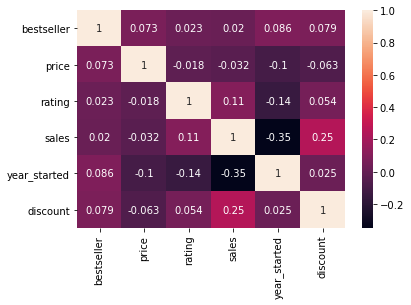

In [661]:
sn.heatmap(corrMatrix, annot=True)
plt.show()